In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
import os
import sys
# Needed for the model class to work inside a Notebook.
os.environ["COBAYA_NOMPI"] = "True"
# Add everything to our paths.
repo = "/global/home/users/nsailer/BOSS_Planck_DMDR/"
for codedir in ["likelihoods/fs_bao/BOSS_fs_bao"]:
    sys.path.append(repo+codedir)

In [3]:
from cobaya.yaml          import yaml_load_file
from cobaya.samplers.mcmc import plot_progress
from cobaya.model         import get_model
#
from getdist.mcsamples    import MCSamplesFromCobaya
from getdist.mcsamples    import loadMCSamples

saved_backend = plt.rcParams["backend"]
import getdist.plots as gdplt
matplotlib.use(saved_backend)

/global/software/sl-7.x86_64/modules/langs/python/3.9/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
db   = "/global/home/users/nsailer/BOSS_Planck_DMDR/yamls/"
info = yaml_load_file(db + "full_boss_analysis_n4.yaml")
print(info['params'].keys())
print(info['output'])

dict_keys(['log_A_s', 'A_s', 'n_s', 'h', 'tau_reio', 'omega_b', 'omega_cdm', 'log10_a_dark', 'a_dark', 'xi_idr', 'b1_NGCz3', 'b2_NGCz3', 'bs_NGCz3', 'b1_SGCz3', 'b2_SGCz3', 'bs_SGCz3', 'b1_NGCz1', 'b2_NGCz1', 'bs_NGCz1', 'b1_SGCz1', 'b2_SGCz1', 'bs_SGCz1', 'B1_z3', 'F_z3', 'B1_z1', 'F_z1'])
/global/home/users/nsailer/BOSS_Planck_DMDR/chains/n4/planck_boss


In [5]:
chain_keys = np.array([
'weight',    
'minuslogpost',         
'log_A_s',             
'n_s',               
'h',        
'tau_reio',         
'omega_b',       
'omega_cdm',    
'log10_a_dark',          
'xi_idr',        
'b1_NGCz3',        
'b2_NGCz3',        
'bs_NGCz3',        
'b1_SGCz3',        
'b2_SGCz3',        
'bs_SGCz3',        
'b1_NGCz1',        
'b2_NGCz1',        
'bs_NGCz1',        
'b1_SGCz1',        
'b2_SGCz1',        
'bs_SGCz1',           
'B1_z3',            
'F_z3',           
'B1_z1',            
'F_z1',        
'A_planck',             
'A_s',          
'a_dark',       
'chi2__CMB',   
'minuslogprior', 
'minuslogprior__0',            
'chi2', 
'chi2__planck_2018_lowl.TT', 
'chi2__planck_2018_lowl.EE', 
'chi2__planck_2018_highl_plik.TTTEEE_lite', 
'chi2__planck_2018_lensing.clik', 
'chi2__joint_boss_likelihoods.FullShapePlusBAO_Z3', 
'chi2__joint_boss_likelihoods.FullShapePlusBAO_Z1', 
'chi2__BOSSxPlanck_Ckg.GxKLikelihood'])

chain = np.genfromtxt('/global/home/users/nsailer/BOSS_Planck_DMDR/chains/n4/planck_boss.1.txt')

In [6]:
chain2 = np.genfromtxt('/global/home/users/nsailer/BOSS_Planck_DMDR/chains/old_no_xcorr_n4/no_xcorr.1.txt')

In [7]:
# find best fit (from chains)
logPs = chain[:,1]
i_bf = np.argmin(logPs)

bf_params = {}
for i in range(2,27): bf_params[chain_keys[i]] = chain[i_bf,i]

In [11]:
chains = []
clist  = []
llist  = []
icol   = 0
for yaml in [\
             "planck_only_n4.yaml",
             "FsBao_planckPrim_noXcorr_n4.yaml",
             "full_boss_analysis_n4.yaml",\
            ]:
    info= yaml_load_file(db + yaml)
    cc  = loadMCSamples(info['output'],no_cache=True,settings={'ignore_rows':0.3})
    p   = cc.getParams()
    chains.append(cc)
    #
    col = 'C'+str(icol)
    clist.append(col)
    llist.append({'ls':'-','color':col})
    icol += 1
#
for cc in chains:
    print(cc.getName())
    #print("R-1=",cc.getGelmanRubin())
    for k in ['log_A_s', 'h', 'log10_a_dark', 'xi_idr']:
        print( cc.getInlineLatex(k) )

planck


\ln(10^{10} A_s) = 3.042\pm 0.016
h = 0.6776^{+0.0052}_{-0.0093}
\log_{10}(a_\mathrm{dark}) > 5.49
\xi < 0.311
no_xcorr


\ln(10^{10} A_s) = 3.039^{+0.020}_{-0.015}
h = 0.6896\pm 0.0045
\log_{10}(a_\mathrm{dark}) = ---
\xi < 0.292
planck_boss
\ln(10^{10} A_s) = 3.021\pm 0.017
h = 0.7039^{+0.0053}_{-0.0048}
\log_{10}(a_\mathrm{dark}) > 8.66
\xi = 0.375^{+0.080}_{-0.056}


In [6]:
chains = []
clist  = []
llist  = []
icol   = 0
for yaml in [\
             "planck_only_LCDM_n4.yaml",
             "FsBao_planckPrim_noXcorr_LCDM_n4.yaml"\
            ]:
    info= yaml_load_file(db + yaml)
    cc  = loadMCSamples(info['output'],no_cache=True,settings={'ignore_rows':0.3})
    p   = cc.getParams()
    chains.append(cc)
    #
    col = 'C'+str(icol)
    clist.append(col)
    llist.append({'ls':'-','color':col})
    icol += 1
#
for cc in chains:
    print(cc.getName())
    print("R-1=",cc.getGelmanRubin())
    for k in ['omega_b', 'omega_cdm','log_A_s', 'n_s','h']:
        print( cc.getInlineLatex(k) )

planck
R-1= 0.00899973429458337
\omega_b = 0.02237\pm 0.00014
\omega_c = 0.1200\pm 0.0012
\ln(10^{10} A_s) = 3.043\pm 0.014
n_s = 0.9641\pm 0.0040
h = 0.6729\pm 0.0053
no_xcorr
R-1= 0.04805453112199576
\omega_b = 0.02258\pm 0.00012
\omega_c = 0.11763^{+0.00052}_{-0.00046}
\ln(10^{10} A_s) = 3.049\pm 0.014
n_s = 0.9701\pm 0.0030
h = 0.6840^{+0.0019}_{-0.0026}


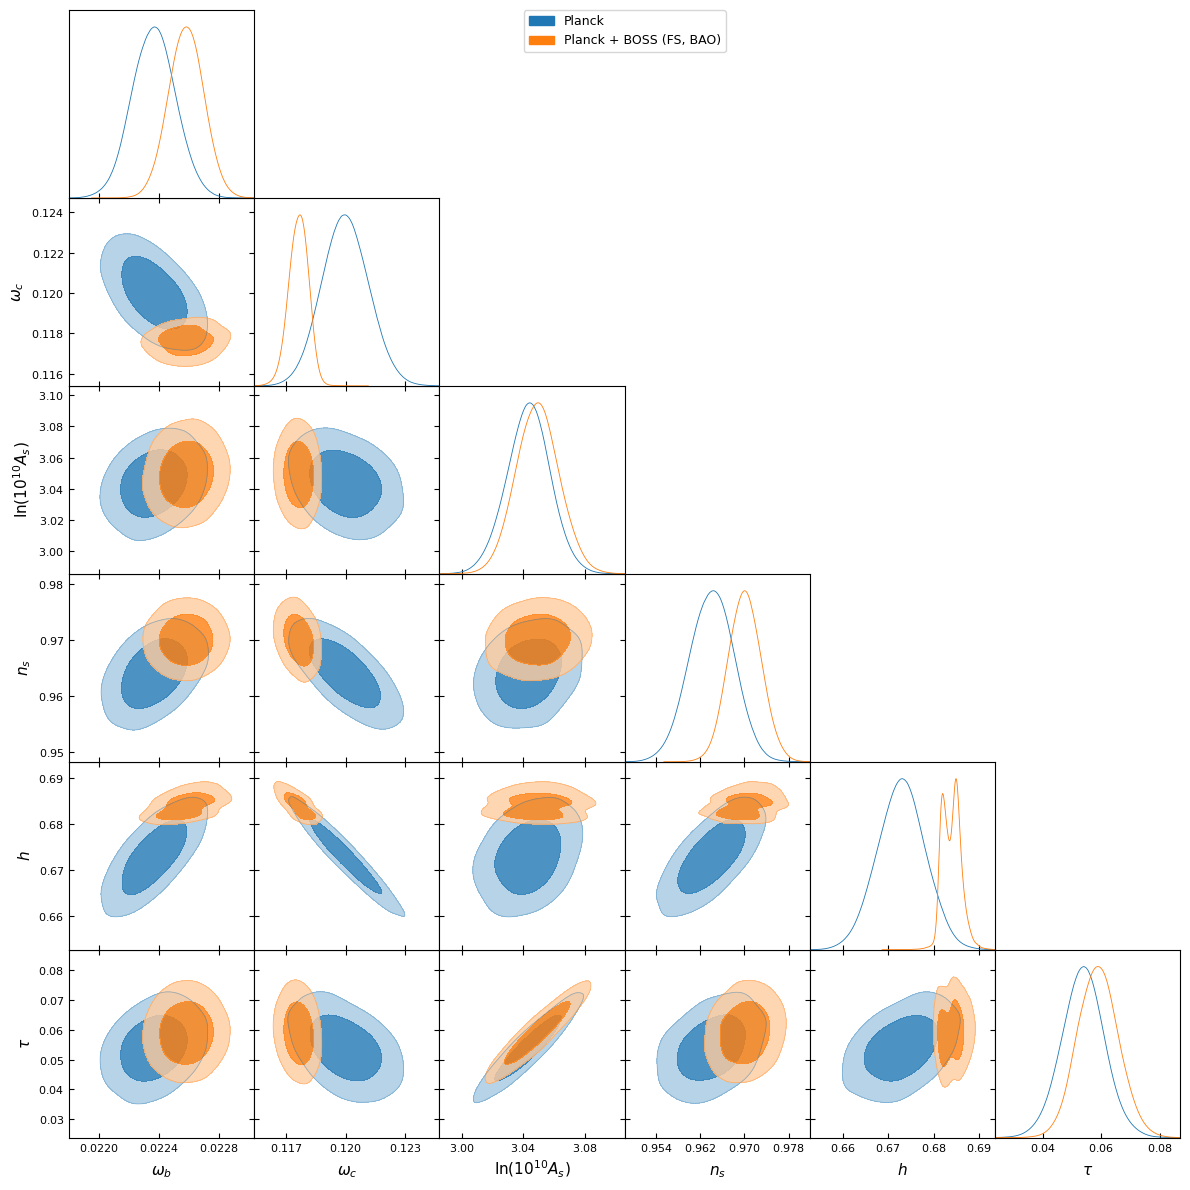

In [7]:
# Do the corner plot.
g = gdplt.get_subplot_plotter()
g.triangle_plot(chains,\
                ['omega_b', 'omega_cdm','log_A_s', 'n_s','h','tau_reio'],\
                colors=clist,\
                line_args=llist,\
                legend_labels=[r'Planck',r'Planck + BOSS (FS, BAO)'],\
                filled=True,alphas=[0.8]*len(chains))

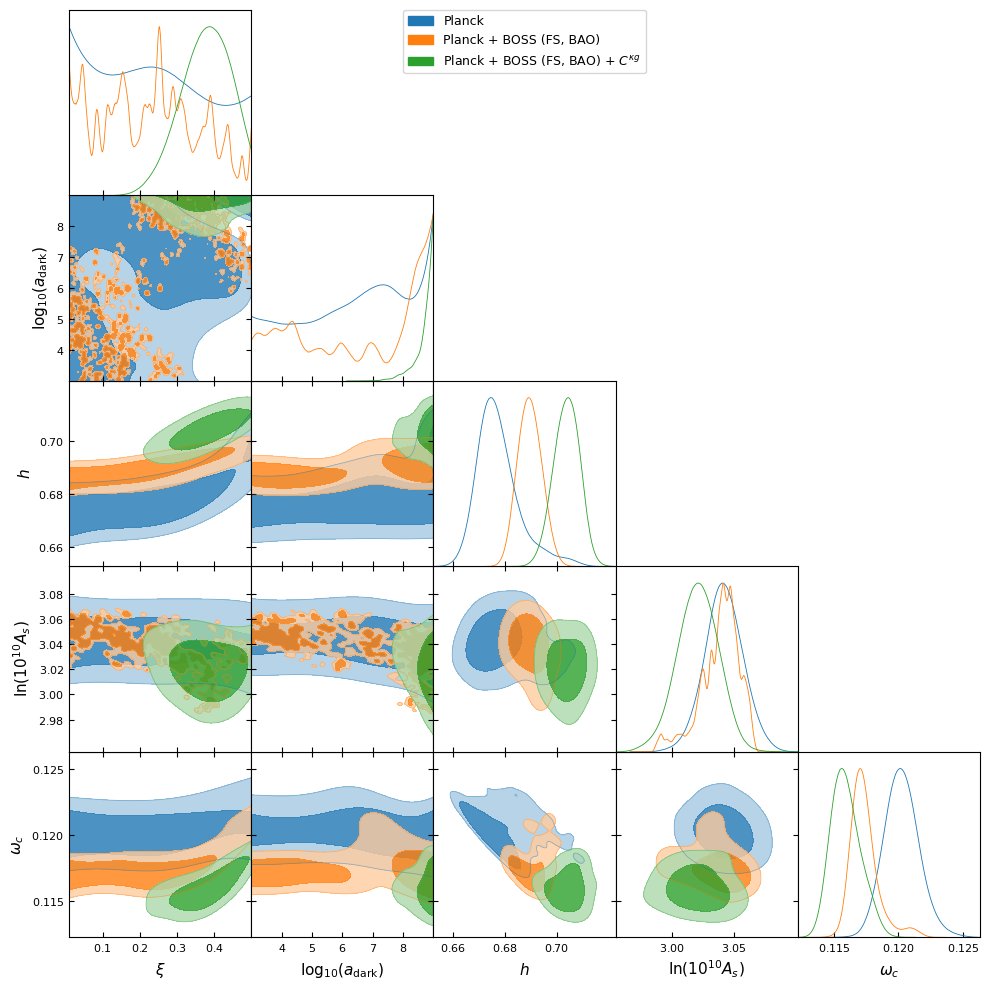

In [12]:
# Do the corner plot.
g = gdplt.get_subplot_plotter()
g.triangle_plot(chains,\
                ['xi_idr','log10_a_dark','h','log_A_s','omega_cdm'],\
                colors=clist,\
                line_args=llist,\
                legend_labels=[r'Planck',r'Planck + BOSS (FS, BAO)',r'Planck + BOSS (FS, BAO) + $C^{\kappa g}$'],\
                filled=True,alphas=[0.8]*len(chains))

In [13]:
chains = []
clist  = []
llist  = []
icol   = 0
for yaml in [\
             "full_boss_analysis_n4.yaml",\
            ]:
    info= yaml_load_file(db + yaml)
    cc  = loadMCSamples(info['output'],no_cache=True,settings={'ignore_rows':0.3})
    p   = cc.getParams()
    chains.append(cc)
    #
    col = 'C'+str(icol)
    clist.append(col)
    llist.append({'ls':'-','color':col})
    icol += 1
#
for cc in chains:
    print(cc.getName())
    #print("R-1=",cc.getGelmanRubin())
    for k in ['log_A_s', 'h', 'log10_a_dark', 'xi_idr']:
        print( cc.getInlineLatex(k) )

planck_boss
\ln(10^{10} A_s) = 3.021\pm 0.017
h = 0.7039^{+0.0053}_{-0.0048}
\log_{10}(a_\mathrm{dark}) > 8.66
\xi = 0.375^{+0.080}_{-0.056}


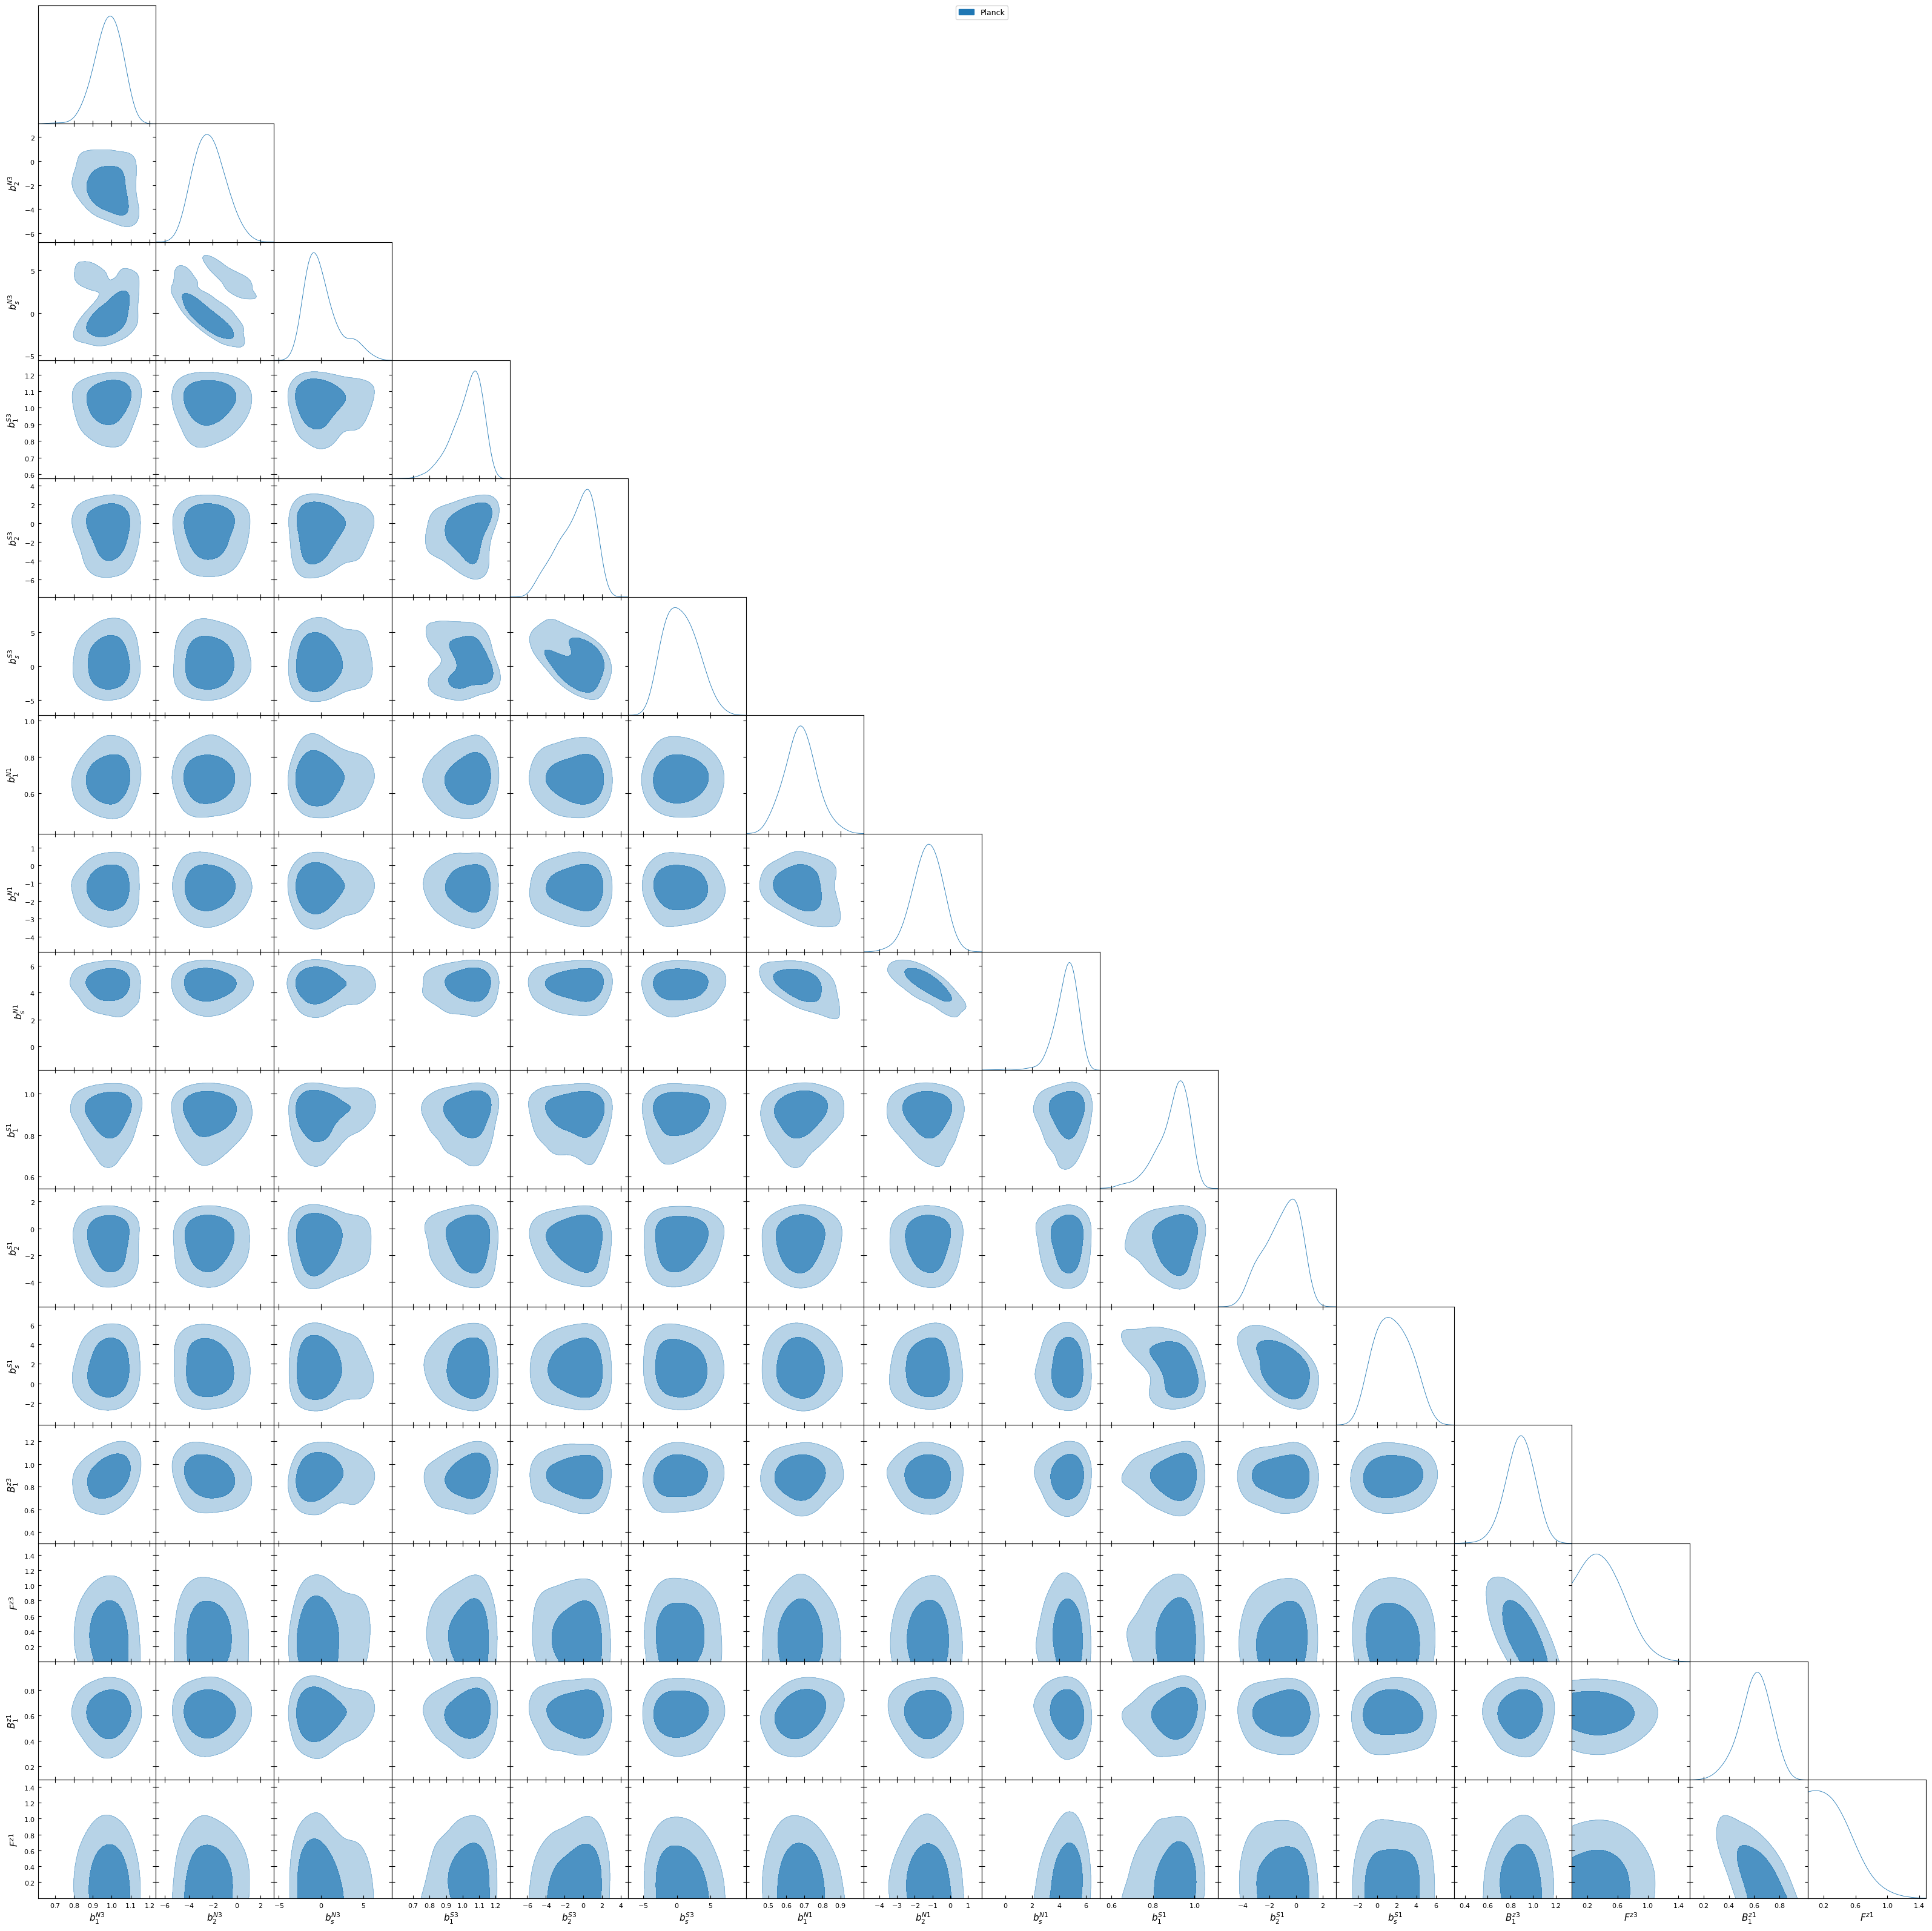

In [14]:
# Do the corner plot.
g = gdplt.get_subplot_plotter()
g.triangle_plot(chains,\
                ['b1_NGCz3',        
                'b2_NGCz3',        
                'bs_NGCz3',        
                'b1_SGCz3',        
                'b2_SGCz3',        
                'bs_SGCz3',        
                'b1_NGCz1',        
                'b2_NGCz1',        
                'bs_NGCz1',        
                'b1_SGCz1',        
                'b2_SGCz1',        
                'bs_SGCz1',           
                'B1_z3',            
                'F_z3',           
                'B1_z1',            
                'F_z1',  ],\
                colors=clist,\
                line_args=llist,\
                legend_labels=[r'Planck',r'Planck + BOSS (FS, BAO and x-corr)'],\
                filled=True,alphas=[0.8]*len(chains))

In [9]:
from cobaya.model import get_model

model = get_model(db+"full_boss_analysis_n4.yaml")

[model] *WARNING* Ignored blocks/options: ['sampler', 'output', 'stop_on_error']
Loading Cl emulator from /global/home/users/nsailer/BOSS_Planck_DMDR/emulators/emulators_Planck_idm_dr_n4_nonlinear_halofit.bson
Loading Pk emulator from /global/home/users/nsailer/BOSS_Planck_DMDR/emulators/emulator_Pk_cb_n4_hubble.bson
Compiling the emulators
Compiled Ctt
Compiled Cte
Compiled Cee
Compiled Cpp
Compiled Pk


INFO:planck_2018_lowl.tt:`clik` module loaded successfully from /global/home/users/nsailer/Cobaya/Packages/code/planck/code/plc_3.0/plc-3.1/lib/python/site-packages/clik


[planck_2018_lowl.tt] `clik` module loaded successfully from /global/home/users/nsailer/Cobaya/Packages/code/planck/code/plc_3.0/plc-3.1/lib/python/site-packages/clik


INFO:planck_2018_lowl.ee:`clik` module loaded successfully from /global/home/users/nsailer/Cobaya/Packages/code/planck/code/plc_3.0/plc-3.1/lib/python/site-packages/clik


[planck_2018_lowl.ee] `clik` module loaded successfully from /global/home/users/nsailer/Cobaya/Packages/code/planck/code/plc_3.0/plc-3.1/lib/python/site-packages/clik


INFO:planck_2018_highl_plik.ttteee_lite:`clik` module loaded successfully from /global/home/users/nsailer/Cobaya/Packages/code/planck/code/plc_3.0/plc-3.1/lib/python/site-packages/clik


[planck_2018_highl_plik.ttteee_lite] `clik` module loaded successfully from /global/home/users/nsailer/Cobaya/Packages/code/planck/code/plc_3.0/plc-3.1/lib/python/site-packages/clik
 Initializing Planck likelihood, version Plik_v22_cmbonly_like                  
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                   


INFO:planck_2018_lensing.clik:`clik` module loaded successfully from /global/home/users/nsailer/Cobaya/Packages/code/planck/code/plc_3.0/plc-3.1/lib/python/site-packages/clik


[planck_2018_lensing.clik] `clik` module loaded successfully from /global/home/users/nsailer/Cobaya/Packages/code/planck/code/plc_3.0/plc-3.1/lib/python/site-packages/clik


In [10]:
point = dict(zip(model.parameterization.sampled_params(),
                 model.prior.sample(ignore_external=True)[0]))

point.update(bf_params)

logposterior = model.logposterior(point, as_dict=True)

In [70]:
like_FsBAO_z1 = model.likelihood['joint_boss_likelihoods.FullShapePlusBAO_Z1']
like_FsBAO_z3 = model.likelihood['joint_boss_likelihoods.FullShapePlusBAO_Z3']
glik = model.likelihood['BOSSxPlanck_Ckg.GxKLikelihood']

thy_bf_z1 = like_FsBAO_z1.get_best_fit()
thy_bf_z3 = like_FsBAO_z3.get_best_fit()
thy_bf_cross = glik.get_best_fit()

In [12]:
p0_bf_NGCz1 = thy_bf_z1[0:40]
p2_bf_NGCz1 = thy_bf_z1[40:80]

p0_bf_SGCz1 = thy_bf_z1[80:120]
p2_bf_SGCz1 = thy_bf_z1[120:160]

x0_bf_z1 = thy_bf_z1[160:196]
x2_bf_z1 = thy_bf_z1[196:232]

########################

p0_bf_NGCz3 = thy_bf_z3[0:40]
p2_bf_NGCz3 = thy_bf_z3[40:80]

p0_bf_SGCz3 = thy_bf_z3[80:120]
p2_bf_SGCz3 = thy_bf_z3[120:160]

x0_bf_z3 = thy_bf_z3[160:196]
x2_bf_z3 = thy_bf_z3[196:232]

[matplotlib.legend] *WARNING* No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[matplotlib.legend] *WARNING* No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[matplotlib.legend] *WARNING* No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[matplotlib.legend] *WARNING* No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[matplotlib.legend] *WARNING* No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[matplotlib.legend] *WARNING* No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[matplotlib.legend] *WARNING* No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


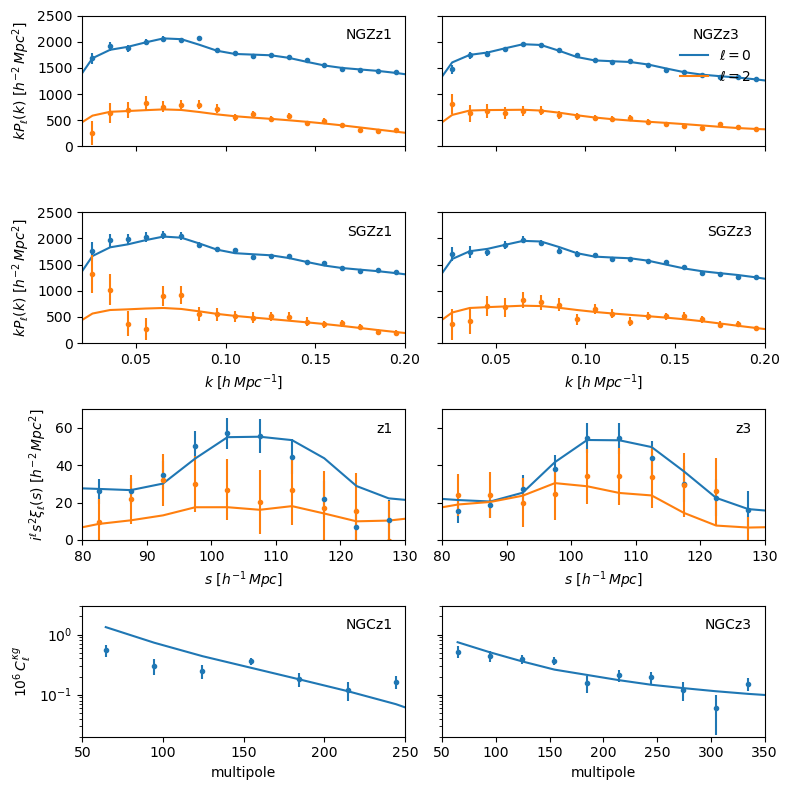

In [91]:
fig, ax = plt.subplots(4,2,figsize=(8,8))

c0 = 'C0'
c2 = 'C1'

kv = like_FsBAO_z1.kv

kdat  = like_FsBAO_z1.kdats
p0dat = like_FsBAO_z1.p0dats
p2dat = like_FsBAO_z1.p2dats
errs  = np.diag(np.loadtxt(like_FsBAO_z1.basedir+like_FsBAO_z1.covfn))**0.5

####################################
sname = 'NGCz1'

ax[0,0].plot(kdat[sname],kdat[sname] * p0_bf_NGCz1,c=c0)
ax[0,0].plot(kdat[sname],kdat[sname] * p2_bf_NGCz1,c=c2)

ax[0,0].errorbar(kdat[sname], kdat[sname] * p0dat[sname], yerr=kdat[sname] * errs[:40], fmt = '.',color=c0)
ax[0,0].errorbar(kdat[sname], kdat[sname] * p2dat[sname], yerr=kdat[sname] * errs[40:80], fmt = '.',color=c2)

ax[0,0].legend(title='NGZz1',frameon=False,loc='upper right')
#####################################
sname = 'SGCz1'

ax[1,0].plot(kdat[sname],kdat[sname] * p0_bf_SGCz1,c=c0)
ax[1,0].plot(kdat[sname],kdat[sname] * p2_bf_SGCz1,c=c2)

ax[1,0].errorbar(kdat[sname], kdat[sname] * p0dat[sname], yerr=kdat[sname] * errs[80:120], fmt = '.',color=c0)
ax[1,0].errorbar(kdat[sname], kdat[sname] * p2dat[sname], yerr=kdat[sname] * errs[120:160], fmt = '.',color=c2)

ax[1,0].legend(title='SGZz1',frameon=False,loc='upper right')
#####################################

kdat  = like_FsBAO_z3.kdats
p0dat = like_FsBAO_z3.p0dats
p2dat = like_FsBAO_z3.p2dats
errs  = np.diag(np.loadtxt(like_FsBAO_z3.basedir+like_FsBAO_z3.covfn))**0.5

#####################################
sname = 'NGCz3'

ax[0,1].plot(kdat[sname],kdat[sname] * p0_bf_NGCz3,c=c0,label=r'$\ell=0$')
ax[0,1].plot(kdat[sname],kdat[sname] * p2_bf_NGCz3,c=c2,label=r'$\ell=2$')

ax[0,1].errorbar(kdat[sname], kdat[sname] * p0dat[sname], yerr=kdat[sname] * errs[:40], fmt = '.',color=c0)
ax[0,1].errorbar(kdat[sname], kdat[sname] * p2dat[sname], yerr=kdat[sname] * errs[40:80], fmt = '.',color=c2)

ax[0,1].legend(title='NGZz3',frameon=False,loc='upper right')
#####################################
sname = 'SGCz3'

ax[1,1].plot(kdat[sname],kdat[sname] * p0_bf_SGCz3,c=c0)
ax[1,1].plot(kdat[sname],kdat[sname] * p2_bf_SGCz3,c=c2)

ax[1,1].errorbar(kdat[sname], kdat[sname] * p0dat[sname], yerr=kdat[sname] * errs[80:120], fmt = '.',color=c0)
ax[1,1].errorbar(kdat[sname], kdat[sname] * p2dat[sname], yerr=kdat[sname] * errs[120:160], fmt = '.',color=c2)

ax[1,1].legend(title='SGZz3',frameon=False,loc='upper right')
#####################################
#####################################
# BAO data now
sname = 'z1'
rdat = like_FsBAO_z1.rdats[sname]
xi0dat = like_FsBAO_z1.xi0dats[sname]
xi2dat = like_FsBAO_z1.xi2dats[sname]
errs  = np.diag(np.loadtxt(like_FsBAO_z1.basedir+like_FsBAO_z1.covfn))**0.5

ax[2,0].errorbar(rdat, rdat**2 * xi0dat, yerr=rdat**2 * errs[160:196], fmt = '.',color=c0)
ax[2,0].errorbar(rdat, rdat**2 * xi2dat, yerr=rdat**2 * errs[196:232], fmt = '.',color=c2)
ax[2,0].plot(rdat,rdat**2 * x0_bf_z1,c=c0)
ax[2,0].plot(rdat,rdat**2 * x2_bf_z1,c=c2)
ax[2,0].legend(loc='upper right',frameon=False,title='z1')
#####################################
sname = 'z3'
rdat = like_FsBAO_z3.rdats[sname]
xi0dat = like_FsBAO_z3.xi0dats[sname]
xi2dat = like_FsBAO_z3.xi2dats[sname]
errs  = np.diag(np.loadtxt(like_FsBAO_z3.basedir+like_FsBAO_z3.covfn))**0.5

ax[2,1].errorbar(rdat, rdat**2 * xi0dat, yerr=rdat**2 * errs[160:196], fmt = '.',color=c0)
ax[2,1].errorbar(rdat, rdat**2 * xi2dat, yerr=rdat**2 * errs[196:232], fmt = '.',color=c2)
ax[2,1].plot(rdat,rdat**2 * x0_bf_z3,c=c0)
ax[2,1].plot(rdat,rdat**2 * x2_bf_z3,c=c2)
ax[2,1].legend(loc='upper right',frameon=False,title='z3')
#####################################
#####################################
# cross correlation


err = np.diag(glik.input_cov)**0.5

ax[3,0].semilogy(glik.xx, 1e6 * thy_bf_cross[32:64], c=c0)
ax[3,1].semilogy(glik.xx, 1e6 * thy_bf_cross[96:128], c=c0)

ax[3,0].errorbar(glik.xx, 1e6 * glik.dd[32:64], yerr=1e6 * err[32:64], fmt = '.',color=c0)
ax[3,1].errorbar(glik.xx, 1e6 * glik.dd[96:128], yerr=1e6 * err[96:128], fmt = '.',color=c0)

ax[3,0].set_xlim(50,250)
ax[3,1].set_xlim(50,350)

ax[3,0].set_ylim(2e-2,3)
ax[3,1].set_ylim(2e-2,3)

ax[3,0].legend(loc='upper right',frameon=False,title='NGCz1')
ax[3,1].legend(loc='upper right',frameon=False,title='NGCz3')
ax[3,1].set_yticklabels([])
ax[3,0].set_ylabel(r'$10^6\,C^{\kappa g}_\ell$')
ax[3,0].set_xlabel(r'multipole')
ax[3,1].set_xlabel(r'multipole')
#####################################
#####################################



for i in range(2):
    for j in range(2):
        ax[i,j].set_xticks([0,0.05,0.1,0.15,0.2])
        ax[i,j].set_yticks([0,500,1000,1500,2000,2500])
        if i == 0: 
            ax[i,j].set_xticklabels([])
        else:
            ax[i,j].set_xlabel(r'$k\,\,[h\,{Mpc}^{-1}]$')
        if j ==1:
            ax[i,j].set_yticklabels([])
        else:
            ax[i,j].set_ylabel(r'$k P_\ell(k)\,\,[h^{-2}\,{Mpc}^{2}]$')
        ax[i,j].set_xlim(0.02,0.2)
        ax[i,j].set_ylim(0,2500)
        
for i in range(2):
    ax[2,i].set_xlim(80,130)
    ax[2,i].set_ylim(0,70)
    ax[2,i].set_xticks([80,90,100,110,120,130])
    ax[2,i].set_yticks([0,20,40,60])
    ax[2,i].set_xlabel(r'$s\,\,[h^{-1}\,{Mpc}]$')
    if i == 1: 
        ax[2,i].set_yticklabels([])
    else:
        ax[2,i].set_ylabel(r'$i^\ell s^2 \xi_\ell(s)\,\,[h^{-2}\,{Mpc}^{2}]$')
        
plt.tight_layout()

INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode


[matplotlib.mathtext] Substituting symbol D from STIXNonUnicode


INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode


[matplotlib.mathtext] Substituting symbol D from STIXNonUnicode


INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode


[matplotlib.mathtext] Substituting symbol D from STIXNonUnicode


INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode


[matplotlib.mathtext] Substituting symbol D from STIXNonUnicode


INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode


[matplotlib.mathtext] Substituting symbol D from STIXNonUnicode


INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode


[matplotlib.mathtext] Substituting symbol D from STIXNonUnicode


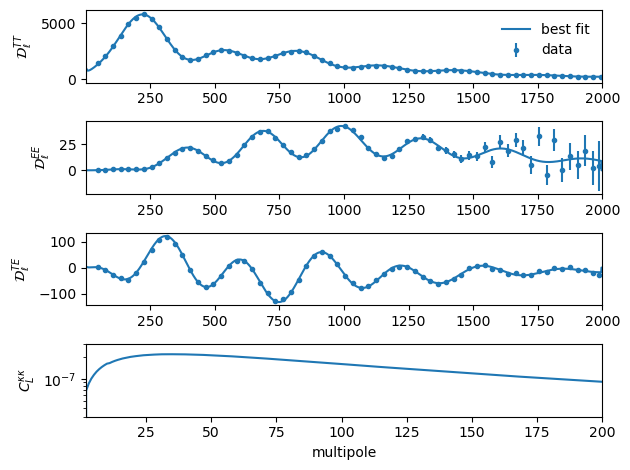

In [135]:
fix,ax = plt.subplots(4,1)

Cls = model.provider.get_Cl()

dat = np.genfromtxt('COM_PowerSpect_CMB-TT-binned_R3.01.txt')
l = Cls['ell']
fac = l * (l+1) / 2 / np.pi
ax[0].plot(l,fac * Cls['tt'],label=r'best fit')
ax[0].errorbar(dat[:,0], dat[:,1], yerr= dat[:,2], fmt = '.',color=c0,label=r'data')
ax[0].set_ylabel(r'$\mathcal{D}_\ell^{TT}$')
ax[0].legend(frameon=False)

dat = np.genfromtxt('COM_PowerSpect_CMB-EE-binned_R3.02.txt')
ax[1].plot(l,fac * Cls['ee'])
ax[1].errorbar(dat[:,0], dat[:,1], yerr= dat[:,2], fmt = '.',color=c0)
ax[1].set_ylabel(r'$\mathcal{D}_\ell^{EE}$')

dat = np.genfromtxt('COM_PowerSpect_CMB-TE-binned_R3.02.txt')
ax[2].plot(l,fac * Cls['te'])
ax[2].errorbar(dat[:,0], dat[:,1], yerr= dat[:,2], fmt = '.',color=c0)
ax[2].set_ylabel(r'$\mathcal{D}_\ell^{TE}$')



ax[3].semilogy(l,l**2 * (l+1)**2 * Cls['pp']/4)
ax[3].set_ylabel(r'$C^{\kappa\kappa}_L$')

ax[3].set_xlabel(r'multipole')

for i in range(3): ax[i].set_xlim(2,2000)
    
ax[3].set_xlim(2,200)
ax[3].set_ylim(3e-8,3e-7)

plt.tight_layout()

In [110]:
dat.shape

(66, 5)

In [104]:
x.

TypeError: calculate() missing 1 required positional argument: 'state'

In [105]:
! wget https://irsa.ipac.caltech.edu/data/Planck/release_3/ancillary-data/cosmoparams/COM_PowerSpect_CMB-EE-binned_R3.02.txt

--2022-11-11 17:59:27--  https://irsa.ipac.caltech.edu/data/Planck/release_3/ancillary-data/cosmoparams/COM_PowerSpect_CMB-EE-binned_R3.02.txt
Resolving irsa.ipac.caltech.edu (irsa.ipac.caltech.edu)... 134.4.54.87
Connecting to irsa.ipac.caltech.edu (irsa.ipac.caltech.edu)|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5698 (5.6K) [text/plain]
Saving to: 'COM_PowerSpect_CMB-EE-binned_R3.02.txt'

COM_PowerSpect_CMB- 100%[===================>]   5.56K  --.-KB/s    in 0s      

2022-11-11 17:59:27 (116 MB/s) - 'COM_PowerSpect_CMB-EE-binned_R3.02.txt' saved [5698/5698]



In [107]:
! wget https://irsa.ipac.caltech.edu/data/Planck/release_3/ancillary-data/cosmoparams/COM_PowerSpect_CMB-TE-binned_R3.02.txt

--2022-11-11 17:59:50--  https://irsa.ipac.caltech.edu/data/Planck/release_3/ancillary-data/cosmoparams/COM_PowerSpect_CMB-TE-binned_R3.02.txt
Resolving irsa.ipac.caltech.edu (irsa.ipac.caltech.edu)... 134.4.54.87
Connecting to irsa.ipac.caltech.edu (irsa.ipac.caltech.edu)|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5698 (5.6K) [text/plain]
Saving to: 'COM_PowerSpect_CMB-TE-binned_R3.02.txt'

COM_PowerSpect_CMB- 100%[===================>]   5.56K  --.-KB/s    in 0s      

2022-11-11 17:59:50 (132 MB/s) - 'COM_PowerSpect_CMB-TE-binned_R3.02.txt' saved [5698/5698]



In [108]:
! wget https://irsa.ipac.caltech.edu/data/Planck/release_3/ancillary-data/cosmoparams/COM_PowerSpect_CMB-TT-binned_R3.01.txt

--2022-11-11 18:00:00--  https://irsa.ipac.caltech.edu/data/Planck/release_3/ancillary-data/cosmoparams/COM_PowerSpect_CMB-TT-binned_R3.01.txt
Resolving irsa.ipac.caltech.edu (irsa.ipac.caltech.edu)... 134.4.54.87
Connecting to irsa.ipac.caltech.edu (irsa.ipac.caltech.edu)|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7143 (7.0K) [text/plain]
Saving to: 'COM_PowerSpect_CMB-TT-binned_R3.01.txt'

COM_PowerSpect_CMB- 100%[===================>]   6.98K  --.-KB/s    in 0s      

2022-11-11 18:00:00 (151 MB/s) - 'COM_PowerSpect_CMB-TT-binned_R3.01.txt' saved [7143/7143]

